In [5]:
from PIL import Image

# Cat image from https://unsplash.com/photos/FqkBXo2Nkq0
cat_img = Image.open("cat.png")

In [6]:
%ls

README.md  cat.png    hw2.ipynb


Images display inline in Jupyter notebooks:

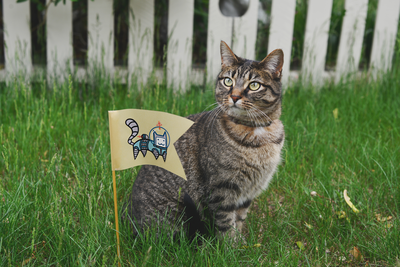

In [7]:
cat_img 

In a Python terminal, you can display the image in a new window with `.show()` instead.

NumPy can convert images to arrays:

In [8]:
import numpy as np

cat = np.array(cat_img)

To convert an array back to an image (for display) use the function below:

In [9]:
def as_image(x):
    """Convert an ndarray to an Image.
    
    Args:
        x (ndarray): The array of pixels.
        
    Returns:
        Image: The Image object.
    """
    return Image.fromarray(np.uint8(x))

In [10]:
cat.shape
#shape are (267, 400, 3)
#There is 3 dimensions, and the first dimension represent red, the second represent green and the last represent blue

(267, 400, 3)

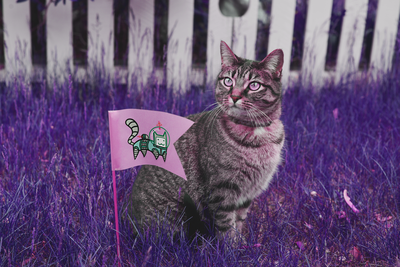

In [11]:
cat1=np.copy(cat)
#since the second and thrid dimension stores green and blue respectively
#the order was swapped in order to display the desired image
cat1[:,:,[1, 2]] = cat1[:,:,[2, 1]]
as_image(cat1)

In [12]:
#since we want to preserve the original array information
#it's better for us to copy array we want to study and store the information in a new array
#if we don't you copy, we need to convert the array back to original if we still want to study the original array.

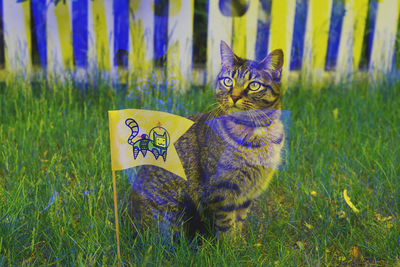

In [13]:
cat2=np.copy(cat)
#blue is a copy to store information for blue channel, which is the second dimension of the image array
blue = cat2[:,:,2]
#use flip function to flip the blue channel from left to right
bluelr=np.fliplr(blue)
#replace the blue channel in image with the flipped blue channel
cat2[:,:,2]=bluelr
#display the image
as_image(cat2)
#As shown in the image, 

## Part 2: Singular Value Decomposition

Suppose $X$ is an $n \times p$ matrix (for instance, one color channel of the cat image). The _singular value decomposition_ (SVD) factors $X$ as $X = UD V^T$, where:

* $U$ is an $n \times n$ orthogonal matrix
* $D$ is an $n \times p$ matrix with zeroes everywhere except the diagonal
* $V$ is an $p \times p$ orthogonal matrix

Note that a matrix $A$ is _orthogonal_ when $A^T A = I$ and $AA^T = I$.

__Example.__ We can use NumPy to compute the SVD for a matrix:

In [15]:
x = np.array(
    [[0, 2, 3],
     [3, 2, 1]]
)
u, d, vt = np.linalg.svd(x)
# Here d is 2x2 because NumPy only returns the diagonal of D.
print("u is:\n", u, "\nd is:\n", d, "\nv^T is:\n", vt)
d

u is:
 [[-0.68145174 -0.73186305]
 [-0.73186305  0.68145174]] 
d is:
 [ 4.52966162  2.54600974] 
v^T is:
 [[-0.48471372 -0.62402665 -0.6128975 ]
 [ 0.80296442 -0.03960025 -0.59470998]
 [ 0.34684399 -0.78039897  0.52026598]]


array([ 4.52966162,  2.54600974])

If we let

* $u_i$ denote the $i$th column of $U$
* $d_i$ denote the $i$th diagonal element of $D$
* $v_i$ denote the $i$th column of $V$

then we can write the SVD as $\ X = UDV^T = d_1 u_1 v_1^T + \ldots + d_m u_m v_m^T\ $ using the rules of matrix multiplication. In other words, the SVD decomposes $X$ into a sum!

If we eliminate some of the terms in the sum, we get a simple approximation for $X$. For instance, we could eliminate all but first 3 terms to get the approximation $X \approx d_1 u_1 v_1^T + d_2 u_2 v_2^T + d_3 u_3 v_3^T$. This is the same as if we:

* Zero all but the first 3 diagonal elements of $D$ to get $D_3$, then compute $X \approx UD_3V^T$
* Eliminate all but the first 3 columns of $V$ to get $p \times 3$ matrix $V_3$, then compute $X \approx UDV_3^T$

We always eliminate terms starting from the end rather than the beginning, because these terms contribute the least to $X$.

Why would we want to approximate a matrix $X$?

In statistics, _principal components analysis_ uses this approximation to reduce the dimension (number of covariates) in a  centered (mean 0) data set. The vectors $d_i u_i$ are called the _principal components_ of $X$. The vectors $v_i^T$ are called the _basis vectors_. Note that both depend on $X$. The dimension is reduced by using the first $q$ principal components instead of the original $p$ covariates. In other words, the $n \times p$ data $X$ is replaced by the $n \times q$ data $UD_q = XV_q$

In computing, this approximation is sometimes used to reduce the number of bits needed to store a matrix (or image). If $q$ terms are kept, then only $nq + pq$ values (for $XV_q$ and $V_q^T$) need to be stored instead of the uncompressed $np$ values.



* A function that takes a matrix $X$ and returns its principal component matrix $XV_q$ and basis matrix $V_q^T$. This function should also take the number of terms kept $q$ as an argument.

* A function that takes a principal component matrix $XV_q$ and basis matrix $V_q^T$ and returns an approximation $\hat{X}$ for the original matrix.



In [16]:
def components(x,q):
    #INPUT: X ndarray, q integer
    u, d, vt = np.linalg.svd(x)
    #priciple component part 
    #since the np.linalg.svd generate the transpose of v matrix, denoted as vt
    #vt to be transpose it back to original v matrix  before further calculation
    v=vt.transpose()
    #extract the first q column of v matrix to get vq matrix 
    vq=v[:,0:q]
    #since UDq=XVq, thus priciple component part can be calculate by multiplying x and vq matrix 
    udq=x.dot(vq)

    #basis part, denoted as vqt, was generated by extracting the first q column of vt matrix 
    vqt=vt[0:q,:]
    
    #Return: Udq principle component matrix, Vqt Basis matrix
    return (udq,vqt)

In [17]:
def estimate(principal, basis):
    #INPUT: principal numpy matrix and basis numpy matrix
    #OUTPUT:the estimated matrix was calculated by multiplyting priciple part and basis part
    return principal.dot(basis)

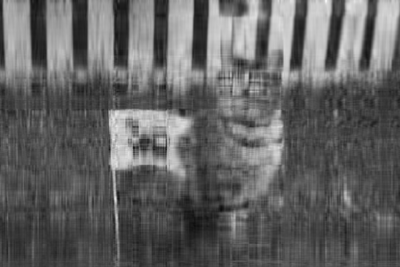

In [130]:
#extract the red channel, which is stored in the first dimension,  from cat matrix
catred=cat[0:268,0:401,0]
#get the estimated matrix by above functions 
(catred_udq,catred_vqt)=components(catred,14)
cat_es=estimate(catred_udq,catred_vqt)
#display image generated by estimated function
as_image(cat_es)
#from the image, we can conclude that when there is 14 terms left, cat is still recognizable as a cat

In [117]:
#function svdfinal is used to generate the number of bytes for both original matrix and after SVD compressed matrix
def svdfinal(q):
    #Argument: q value(interger) for SVD method 
    catred=cat[0:268,0:401,0]
    (catred_udq,catred_vqt)=components(catred,q)
    a=catred.astype("complex128").nbytes
    b=catred_udq.astype("complex128").nbytes+catred_vqt.astype("complex128").nbytes
    #OUTPUT: bytes for original red channel of image and compressed version in ndarray form
    return (a,b)

In [118]:
#get the bytes of compressed version using SVD method when q=10
(a,b)=svdfinal(10)
print("bytes for the red color channel of the cat image: ",a)
print("bytes for the compressed version (SVD): ",b)
print("percentage of the original size: " ,b*100/a,"%")

bytes for the red color channel of the cat image:  1708800
bytes for the compressed version (SVD):  106720
percentage of the original size:  6.245318352059925 %


## Part 3: Fast Fourier Transform

The 2-dimensional _fast Fourier transform_ (FFT) is another way to decompose a matrix $X$ as a sum. The math behind the FFT is interesting but fairly advanced.

__Example.__ We can use NumPy to compute the FFT for a real-valued matrix:

In [20]:
x = np.array(
    [[0, 2, 3],
     [3, 2, 1]]
)
x_coef = np.fft.rfft2(x)
print(x_coef)

[[ 11.+0.j          -1.+0.j        ]
 [ -1.+0.j          -4.+1.73205081j]]


The return value is a matrix of complex coefficients. We can also use NumPy to invert the FFT:

In [21]:
# The second argument tells NumPy the dimensions of the original X.
np.fft.irfft2(x_coef, x.shape)

array([[ 0.,  2.,  3.],
       [ 3.,  2.,  1.]])

The FFT coefficients serve a role similar to the $d_i$ terms in the SVD. Terms in the FFT sum (which wasn't displayed) can be eliminated by setting coefficients to zero. This means we can also use the FFT for dimension reduction or file compression! For the FFT, we always eliminate terms starting from the bottom right corner of the coefficient matrix, because the terms for these coefficients contribue the least to $X$. As before, we use $q$ to denote the number of terms kept.

For file compression, the FFT differs from the SVD in an important way: we don't need to store the basis matrix. This is because the FFT always uses the same basis matrix regardless of $X$.

__Example.__ To compress the matrix in the previous example, we could eliminate one term:

In [22]:
# Zero the coefficient in the bottom right corner.
x_coef[1:, 1:] = 0
print("x_coef is:\n", x_coef, "\nx approx is:\n", np.fft.irfft2(x_coef, x.shape))

x_coef is:
 [[ 11.+0.j  -1.+0.j]
 [ -1.+0.j   0.+0.j]] 
x approx is:
 [[ 1.33333333  1.83333333  1.83333333]
 [ 1.66666667  2.16666667  2.16666667]]


As you can see, for a matrix this small eliminating even one term gives a poor approximation.

In [70]:
def fft_decom(x,n):
    #Argument: orginal ndarray and integer(location start to zeroing out in the bottom right cornor)
    x_coef = np.fft.rfft2(x)
    #remove the right bottom n*n matrix from the original coefficient matrix 
    x_coef[-n:, -n:] = 0
    #OUTPUT: FFT coeffcient ndarray and dimension of FFT coefficient ndarray
    return (x_coef, x.shape)

In [71]:
def estimate_fft(x_coef, shape):
    #this function is used to generate the estimated matrix using FFT method 
    #Argument: FFT coeffcient ndarray and dimension of FFT coefficient ndarray
    #OUTPUT: estimated matrix (in ndarray format)
    return(np.fft.irfft2(x_coef, shape))

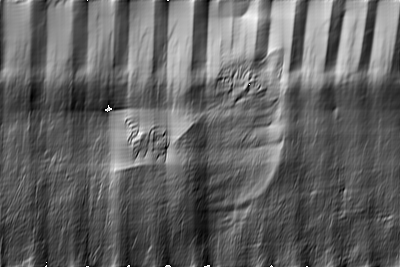

In [72]:
#extract the red channel, which is stored in the first dimension,  from cat matrix
catred=cat[0:268,0:401,0]
#get the estimated matrix by above functions 
(catred_coef,catred_dim)=fft_decom(catred,200)
cat_es_fft=estimate_fft(catred_coef,catred_dim)
#display image generated by estimated function
as_image(cat_es_fft)
#from the image, we can conclude that when q=200 
#(200*200 was removed from the right bottom of the original coefficient matrix)
#cat is still recognizable as a cat

__Exercise 3.2.__ For both decompositions (SVD and FFT), examine the number of bytes and image clarity at several values of $q$. Which decomposition would you expect to work better for dimension reduction? Which decomposition would you expect to work better for file compression? Think about this carefully and explain your reasoning.

In [87]:
#function svdfinal is used to generate the number of bytes for both original matrix and after FFT compressed matrix
def fftfinal(n):
    #Argument: (integer) n value for FFT method
    (catred_coef,catred_dim)=fft_decom(catred,n)
    x=catred.astype('complex128').nbytes
    y=catred_coef.astype('complex128').nbytes
    z= np.fft.rfft2(catred)[-n:, -n:].nbytes
    #OUTPUT: bytes for original matrix, coefficient matrix , and removed matrix part
    return (x,y,z)

In [ ]:
'''For dimensional reduction'''
#set the percentage of the original size to 6.2%
#find the n and q for FFT and SVD method 
#compare the clarity of pictures in order to determine which one has better dimension reduction ability

bytes for the red color channel of the cat image:  1708800
bytes for the compressed version (FFT):  106128
percentage of the original size:  6.21067415730337 %


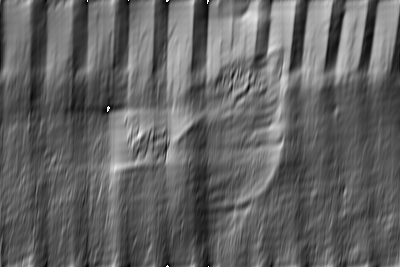

In [122]:
#use fftfinal to find n value that get the percentage of the original size around 6.2%
(x,y,z)=fftfinal(234)
print("bytes for the red color channel of the cat image: ",x)
print("bytes for the compressed version (FFT): ",y-z)
print("percentage of the original size: " ,(y-z)*100/x,"%")
#the n value was determined to be 234
#use n=234 to get the image of estimated matrix by FFT method
(catred_coef,catred_dim)=fft_decom(catred,234)
cat_es_fft=estimate_fft(catred_coef,catred_dim)
as_image(cat_es_fft)

bytes for the red color channel of the cat image:  1708800
bytes for the compressed version (SVD):  106720
percentage of the original size:  6.245318352059925 %


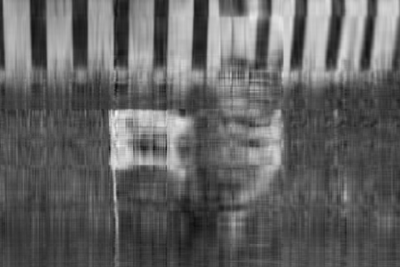

In [123]:
#since in the previous question, we already know when q=n, SVD generates a matrix 
#with percentage of the original size of  6.24%, which is close enough to 6.2%
(catred_udq,catred_vqt)=components(catred,10)
a=catred.astype("complex128").nbytes
b=catred_udq.astype("complex128").nbytes+catred_vqt.astype("complex128").nbytes
print("bytes for the red color channel of the cat image: ",a)
print("bytes for the compressed version (SVD): ",b)
print("percentage of the original size: " ,b*100/a,"%")
#use q=10 to get the image of estimated matrix by SVD method
(catred_udq,catred_vqt)=components(catred,10)
cat_es=estimate(catred_udq,catred_vqt)
as_image(cat_es)

In [ ]:
#By comparing the 2 image with the same percentage of original size,
#the image generated by SVD is clearer than FFT.
#Thus SVD has a better dimension reduction ability

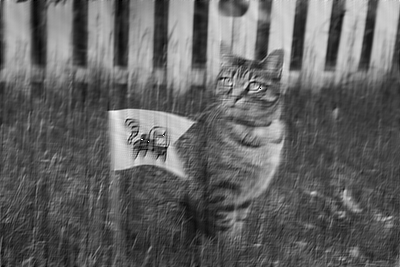

In [113]:
'''For File compression'''
#Now, we set the picture with similar clarity and find out which method has smaller bytes 
#set n value to 175 for FFT
(catred_coef,catred_dim)=fft_decom(catred,175)
cat_es_fft=estimate_fft(catred_coef,catred_dim)
as_image(cat_es_fft)

In [127]:
#find out the bytes for n=175 using FFT
(x,y,z)=fftfinal(175)
print("bytes for the compressed version (FFT): ",y-z)
print("percentage of the original size: " ,(y-z)*100/x,"%")

bytes for the red color channel of the cat image:  1708800
bytes for the compressed version (FFT):  368672
percentage of the original size:  21.574906367041198 %


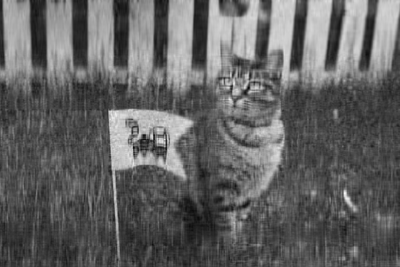

In [125]:
#find the q value for SVD method that has the same clarity as the above image
#and the q value was determied to be 28
(catred_udq,catred_vqt)=components(catred,28)
cat_es=estimate(catred_udq,catred_vqt)
as_image(cat_es)

In [128]:
#find out the bytes for q=28 using SVD
(catred_udq,catred_vqt)=components(catred,28)
a=catred.astype("complex128").nbytes
b=catred_udq.astype("complex128").nbytes+catred_vqt.astype("complex128").nbytes
print("bytes for the compressed version (SVD): ",b)
print("percentage of the original size: " ,b*100/a,"%")

bytes for the compressed version (SVD):  298816
percentage of the original size:  17.48689138576779 %


In [ ]:
'''Conclusion'''
#with the same photo clarity (based on personal judgement), bytes for SVD (298816) is smaller than FFT (368672)
#SVD has better compression ability
#Thus SVD work better both for file compression and dimension reduction.


'''Improvement'''
#Note that the above comparison is purely based on personal judgement, the comparison of clarity between pictures
#are subjuctive. Thus the conclusion might be inaccurate.
#If there is some method to determine the clarity of picture, it will be helpful for us to determine file compression 
#and dimension reduction ability of FFT and SVD method.